In [137]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
# load dataset
data = pd.read_csv('car_prediction.txt')
df = data.copy()
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [139]:
df.shape

(892, 6)

In [140]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [141]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [142]:
df.info()
# All the features are in object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [143]:
df['year'].value_counts().index

Index(['2015', '2014', '2013', '2016', '2012', '2011', '2017', '2009', '2010',
       '2018', '2019', '2006', '2007', '2008', '2005', '2003', '2004', '2000',
       '2002', '2001', 'sale', '...', 'Zest', 'o...', 'd...', 'car', '1995',
       'no.', '2 bs', 'emi', 'digo', 'ture', 'odel', 'Sumo', 'o c4', '/-Rs',
       'D...', 'e...', 'SALE', ', Ac', 'arry', 't xe', '150k', 'k...', 'd Ex',
       'zire', 'cent', 'TOUR', 'EV2', 'cab', 'tion', 'go .', 'ara)', 'r 15',
       'n...', 'SELL', 'able', 'sell', 'r...', 'zest', 'Eon'],
      dtype='object')

In [144]:
# CLEANING THE 'YEAR' COLUMN

# The year column contains other string values which has no year menationed - irrelevant data 
# removing all those years and converting the year column to numeric
df = df[df['year'].str.isnumeric()]
df['year'] = df['year'].astype(int)

In [145]:
df['Price'].value_counts().index

Index(['Ask For Price', '2,50,000', '3,50,000', '4,00,000', '1,30,000',
       '1,80,000', '2,10,000', '4,50,000', '90,000', '1,20,000',
       ...
       '4,01,000', '14,90,000', '4,01,919', '6,44,999', '10,25,000',
       '11,50,000', '15,99,000', '7,99,999', '10,74,999', '5,00,001'],
      dtype='object', length=273)

In [146]:
# CLEANING THE PRICE COLUMN

# The price columns contains some strings and also the values are in commas
# removing all the strings and converting into numeric

df = df[df['Price'] != 'Ask For Price']
df['Price'] = df['Price'].str.replace(',','').astype(int)


In [147]:
df['kms_driven'].value_counts()

45,000 kms      30
35,000 kms      29
55,000 kms      25
50,000 kms      23
20,000 kms      21
                ..
16,934 kms       1
15,975 kms       1
88,000 kms       1
1,95,000 kms     1
2,110 kms        1
Name: kms_driven, Length: 250, dtype: int64

In [148]:
#CLEANING THE KMS_DRIVEN COLUMN

# The column contains commas in values and kms in the end

df['kms_driven'] = df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
df = df[df['kms_driven'].str.isnumeric()]
df['kms_driven'] = df['kms_driven'].astype(int)

In [149]:
df['fuel_type'].value_counts()

Petrol    428
Diesel    386
LPG         2
Name: fuel_type, dtype: int64

In [150]:
# CLEANING FUEL_TYPE

# There is one NaN value 
# convert the categories to numeric- label encoding

df = df[~df['fuel_type'].isna()]

In [151]:
# CLEANING NAME column

# Keep only the first 3 words of the name

df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [152]:
# CLEANED DATA
df.reset_index(drop = True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [154]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [155]:
# In the price the max value is high

df = df[df['Price']<6e6].reset_index(drop = True)


In [156]:
df.to_csv('Cleaned_dataset_car.csv', index = False)

In [199]:
data_cleaned = pd.read_csv('Cleaned_dataset_car.csv')

In [200]:
data_cleaned

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


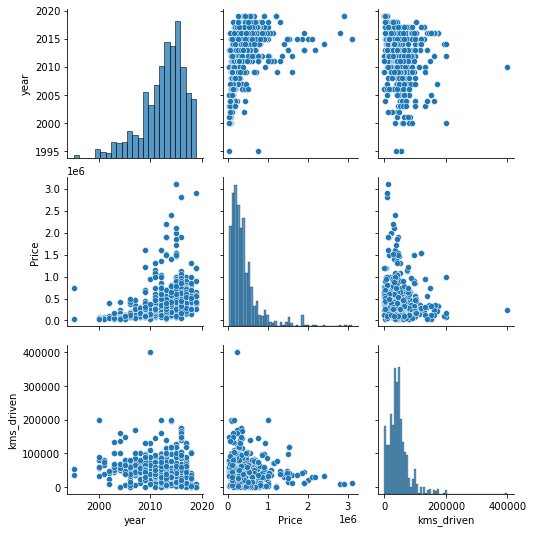

In [201]:
# EDA
sns.pairplot(data_cleaned)

C:\Users\DHARINI PARGUNAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

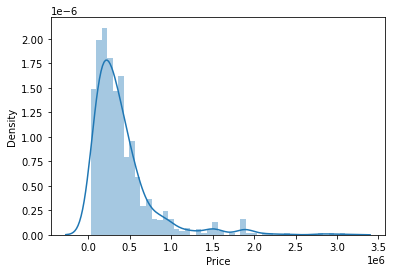

In [202]:
sns.distplot(data_cleaned['Price'])

<AxesSubplot:>

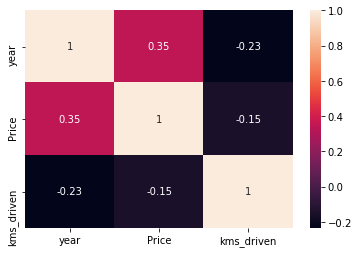

In [203]:
sns.heatmap(data_cleaned.corr(), annot = True)

In [204]:
X = data_cleaned.drop(columns = 'Price')
Y = data_cleaned['Price']

In [205]:
print(X.shape, Y.shape)

(815, 5) (815,)


In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [208]:
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [209]:
column_trans = make_column_transformer ((OneHotEncoder(categories = ohe.categories_),['name', 'company', 'fuel_type']),
                                       remainder = 'passthrough')

In [210]:
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train, Y_train)

lr.intercept_, lr.coef_

y_pred_test = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

In [211]:
r2_score(Y_test,y_pred_test)

0.7459931358072509

In [212]:
r2_score(Y_train,y_pred_train)

# OVERFITTING

0.9532578849601909

In [213]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,y_pred_test)))

Mean Absolute Error: 101690.8049664587
Mean Squared Error: 32433191829.484562
Root Mean Squared Error: 180092.17592523157


In [214]:
data_cleaned

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [215]:
import pickle

In [216]:
pickle.dump(pipe, open('LinearRegressionModel.pkl','wb'))

In [222]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2001,200,'Petrol']],
                         columns = ['name', 'company', 'year', 'kms_driven', 'fuel_type']))

array([12119.98043865])

In [223]:
data_cleaned[(data_cleaned['company']=='Maruti') & (data_cleaned['year']==2019)]


,name,company,year,Price,kms_driven,fuel_type
290,Maruti Suzuki Swift,Maruti,2019,610000,73,Petrol
538,Maruti Suzuki Alto,Maruti,2019,265000,9800,Petrol
775,Maruti Suzuki Alto,Maruti,2019,400000,1500,Petrol
778,Maruti Suzuki Alto,Maruti,2019,425000,1625,Petrol
